<a href="https://colab.research.google.com/github/ramkumarsanthanasekaran/Drilling-Tool-Wear-Prediction-using-Deep-Neural-Network/blob/main/Drilling_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('XAI_Drilling_Dataset.csv')

In [ ]:
data

,ID,Cutting speed vc [m/min],Spindle speed n [1/min],Feed f [mm/rev],Feed rate vf [mm/min],Power Pc [kW],Cooling [%],Material,Drill Bit Type,Process Time [sec],Main Failure
0,1,29.92,794,0.218,173,194.87,75,N,W,19.26,0
1,2,29.85,792,0.241,191,214.71,75,N,W,19.55,0
2,3,22.85,606,0.183,111,95.68,50,P,N,36.16,0
3,4,29.60,785,0.236,237,206.93,75,N,W,21.22,1
4,5,17.43,462,0.246,114,74.85,50,K,H,33.56,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,22.93,608,0.203,124,106.88,50,P,N,34.02,0
19996,19997,30.40,806,0.265,214,245.36,100,N,W,19.86,0
19997,19998,22.91,608,0.204,124,106.89,50,P,N,33.96,0
19998,19999,22.65,601,0.184,110,94.26,50,P,N,35.86,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20000 non-null  int64  
 1   Cutting speed vc [m/min]  20000 non-null  float64
 2   Spindle speed n [1/min]   20000 non-null  int64  
 3   Feed f [mm/rev]           20000 non-null  float64
 4   Feed rate vf [mm/min]     20000 non-null  int64  
 5   Power Pc [kW]             20000 non-null  float64
 6   Cooling [%]               20000 non-null  int64  
 7   Material                  20000 non-null  object 
 8   Drill Bit Type            20000 non-null  object 
 9   Process Time [sec]        20000 non-null  float64
 10  Main Failure              20000 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.7+ MB


In [ ]:
data['Material']=data['Material'].replace({'K':1,'N':2,'P':3})
data

,ID,Cutting speed vc [m/min],Spindle speed n [1/min],Feed f [mm/rev],Feed rate vf [mm/min],Power Pc [kW],Cooling [%],Material,Drill Bit Type,Process Time [sec],Main Failure
0,1,29.92,794,0.218,173,194.87,75,2,W,19.26,0
1,2,29.85,792,0.241,191,214.71,75,2,W,19.55,0
2,3,22.85,606,0.183,111,95.68,50,3,N,36.16,0
3,4,29.60,785,0.236,237,206.93,75,2,W,21.22,1
4,5,17.43,462,0.246,114,74.85,50,1,H,33.56,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,22.93,608,0.203,124,106.88,50,3,N,34.02,0
19996,19997,30.40,806,0.265,214,245.36,100,2,W,19.86,0
19997,19998,22.91,608,0.204,124,106.89,50,3,N,33.96,0
19998,19999,22.65,601,0.184,110,94.26,50,3,N,35.86,0


In [ ]:
data['Drill Bit Type']=data['Drill Bit Type'].replace({'H':1,'N':2,'W':3})
data

,ID,Cutting speed vc [m/min],Spindle speed n [1/min],Feed f [mm/rev],Feed rate vf [mm/min],Power Pc [kW],Cooling [%],Material,Drill Bit Type,Process Time [sec],Main Failure
0,1,29.92,794,0.218,173,194.87,75,2,3,19.26,0
1,2,29.85,792,0.241,191,214.71,75,2,3,19.55,0
2,3,22.85,606,0.183,111,95.68,50,3,2,36.16,0
3,4,29.60,785,0.236,237,206.93,75,2,3,21.22,1
4,5,17.43,462,0.246,114,74.85,50,1,1,33.56,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,22.93,608,0.203,124,106.88,50,3,2,34.02,0
19996,19997,30.40,806,0.265,214,245.36,100,2,3,19.86,0
19997,19998,22.91,608,0.204,124,106.89,50,3,2,33.96,0
19998,19999,22.65,601,0.184,110,94.26,50,3,2,35.86,0


In [ ]:
data.dropna(axis=0,inplace=True)
data

,ID,Cutting speed vc [m/min],Spindle speed n [1/min],Feed f [mm/rev],Feed rate vf [mm/min],Power Pc [kW],Cooling [%],Material,Drill Bit Type,Process Time [sec],Main Failure
0,1,29.92,794,0.218,173,194.87,75,2,3,19.26,0
1,2,29.85,792,0.241,191,214.71,75,2,3,19.55,0
2,3,22.85,606,0.183,111,95.68,50,3,2,36.16,0
3,4,29.60,785,0.236,237,206.93,75,2,3,21.22,1
4,5,17.43,462,0.246,114,74.85,50,1,1,33.56,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,22.93,608,0.203,124,106.88,50,3,2,34.02,0
19996,19997,30.40,806,0.265,214,245.36,100,2,3,19.86,0
19997,19998,22.91,608,0.204,124,106.89,50,3,2,33.96,0
19998,19999,22.65,601,0.184,110,94.26,50,3,2,35.86,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20000 non-null  int64  
 1   Cutting speed vc [m/min]  20000 non-null  float64
 2   Spindle speed n [1/min]   20000 non-null  int64  
 3   Feed f [mm/rev]           20000 non-null  float64
 4   Feed rate vf [mm/min]     20000 non-null  int64  
 5   Power Pc [kW]             20000 non-null  float64
 6   Cooling [%]               20000 non-null  int64  
 7   Material                  20000 non-null  int64  
 8   Drill Bit Type            20000 non-null  int64  
 9   Process Time [sec]        20000 non-null  float64
 10  Main Failure              20000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.7 MB


In [ ]:
output=data.pop('Main Failure')
input=data

In [ ]:
output

0        0
1        0
2        0
3        1
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: Main Failure, Length: 20000, dtype: int64

In [ ]:
input

,ID,Cutting speed vc [m/min],Spindle speed n [1/min],Feed f [mm/rev],Feed rate vf [mm/min],Power Pc [kW],Cooling [%],Material,Drill Bit Type,Process Time [sec]
0,1,29.92,794,0.218,173,194.87,75,2,3,19.26
1,2,29.85,792,0.241,191,214.71,75,2,3,19.55
2,3,22.85,606,0.183,111,95.68,50,3,2,36.16
3,4,29.60,785,0.236,237,206.93,75,2,3,21.22
4,5,17.43,462,0.246,114,74.85,50,1,1,33.56
...,...,...,...,...,...,...,...,...,...,...
19995,19996,22.93,608,0.203,124,106.88,50,3,2,34.02
19996,19997,30.40,806,0.265,214,245.36,100,2,3,19.86
19997,19998,22.91,608,0.204,124,106.89,50,3,2,33.96
19998,19999,22.65,601,0.184,110,94.26,50,3,2,35.86


In [ ]:
normalize=tf.keras.layers.Normalization()
normalize.adapt(np.array(input))

In [ ]:
model=tf.keras.models.Sequential([
    normalize,
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(input,output,epochs=500)

Epoch 1/500
625/625 [==============================] - 1s 684us/step - loss: 0.0666 - accuracy: 0.9323
Epoch 2/500
625/625 [==============================] - 0s 667us/step - loss: 0.0457 - accuracy: 0.9500
Epoch 3/500
625/625 [==============================] - 0s 668us/step - loss: 0.0412 - accuracy: 0.9516
Epoch 4/500
625/625 [==============================] - 0s 661us/step - loss: 0.0327 - accuracy: 0.9572
Epoch 5/500
625/625 [==============================] - 0s 656us/step - loss: 0.0250 - accuracy: 0.9682
Epoch 6/500
625/625 [==============================] - 0s 652us/step - loss: 0.0211 - accuracy: 0.9769
Epoch 7/500
625/625 [==============================] - 0s 652us/step - loss: 0.0194 - accuracy: 0.9775
Epoch 8/500
625/625 [==============================] - 0s 650us/step - loss: 0.0175 - accuracy: 0.9780
Epoch 9/500
625/625 [==============================] - 0s 662us/step - loss: 0.0164 - accuracy: 0.9801
Epoch 10/500
625/625 [==============================] - 0s 663us/step - l

625/625 [==============================] - 0s 646us/step - loss: 0.0111 - accuracy: 0.9870
Epoch 80/500
625/625 [==============================] - 0s 641us/step - loss: 0.0112 - accuracy: 0.9872
Epoch 81/500
625/625 [==============================] - 0s 650us/step - loss: 0.0111 - accuracy: 0.9875
Epoch 82/500
625/625 [==============================] - 0s 648us/step - loss: 0.0111 - accuracy: 0.9873
Epoch 83/500
625/625 [==============================] - 0s 654us/step - loss: 0.0111 - accuracy: 0.9876
Epoch 84/500
625/625 [==============================] - 0s 644us/step - loss: 0.0110 - accuracy: 0.9876
Epoch 85/500
625/625 [==============================] - 0s 653us/step - loss: 0.0110 - accuracy: 0.9874
Epoch 86/500
625/625 [==============================] - 0s 648us/step - loss: 0.0109 - accuracy: 0.9874
Epoch 87/500
625/625 [==============================] - 0s 655us/step - loss: 0.0110 - accuracy: 0.9873
Epoch 88/500
625/625 [==============================] - 0s 656us/step - loss:

625/625 [==============================] - 0s 647us/step - loss: 0.0089 - accuracy: 0.9897
Epoch 158/500
625/625 [==============================] - 0s 643us/step - loss: 0.0089 - accuracy: 0.9899
Epoch 159/500
625/625 [==============================] - 0s 652us/step - loss: 0.0089 - accuracy: 0.9902
Epoch 160/500
625/625 [==============================] - 0s 659us/step - loss: 0.0089 - accuracy: 0.9901
Epoch 161/500
625/625 [==============================] - 0s 646us/step - loss: 0.0088 - accuracy: 0.9898
Epoch 162/500
625/625 [==============================] - 0s 642us/step - loss: 0.0088 - accuracy: 0.9900
Epoch 163/500
625/625 [==============================] - 0s 661us/step - loss: 0.0088 - accuracy: 0.9899
Epoch 164/500
625/625 [==============================] - 0s 652us/step - loss: 0.0087 - accuracy: 0.9901
Epoch 165/500
625/625 [==============================] - 0s 653us/step - loss: 0.0087 - accuracy: 0.9899
Epoch 166/500
625/625 [==============================] - 0s 658us/ste

625/625 [==============================] - 0s 652us/step - loss: 0.0079 - accuracy: 0.9908
Epoch 236/500
625/625 [==============================] - 0s 652us/step - loss: 0.0080 - accuracy: 0.9903
Epoch 237/500
625/625 [==============================] - 0s 653us/step - loss: 0.0079 - accuracy: 0.9911
Epoch 238/500
625/625 [==============================] - 0s 652us/step - loss: 0.0079 - accuracy: 0.9910
Epoch 239/500
625/625 [==============================] - 0s 658us/step - loss: 0.0080 - accuracy: 0.9905
Epoch 240/500
625/625 [==============================] - 0s 663us/step - loss: 0.0078 - accuracy: 0.9909
Epoch 241/500
625/625 [==============================] - 0s 649us/step - loss: 0.0078 - accuracy: 0.9913
Epoch 242/500
625/625 [==============================] - 0s 650us/step - loss: 0.0079 - accuracy: 0.9902
Epoch 243/500
625/625 [==============================] - 0s 653us/step - loss: 0.0079 - accuracy: 0.9909
Epoch 244/500
625/625 [==============================] - 0s 653us/ste

625/625 [==============================] - 0s 657us/step - loss: 0.0074 - accuracy: 0.9915
Epoch 314/500
625/625 [==============================] - 0s 646us/step - loss: 0.0073 - accuracy: 0.9916
Epoch 315/500
625/625 [==============================] - 0s 652us/step - loss: 0.0074 - accuracy: 0.9917
Epoch 316/500
625/625 [==============================] - 0s 676us/step - loss: 0.0074 - accuracy: 0.9915
Epoch 317/500
625/625 [==============================] - 0s 662us/step - loss: 0.0073 - accuracy: 0.9915
Epoch 318/500
625/625 [==============================] - 0s 651us/step - loss: 0.0073 - accuracy: 0.9918
Epoch 319/500
625/625 [==============================] - 0s 647us/step - loss: 0.0074 - accuracy: 0.9915
Epoch 320/500
625/625 [==============================] - 0s 654us/step - loss: 0.0074 - accuracy: 0.9915
Epoch 321/500
625/625 [==============================] - 0s 658us/step - loss: 0.0074 - accuracy: 0.9911
Epoch 322/500
625/625 [==============================] - 0s 660us/ste

625/625 [==============================] - 0s 650us/step - loss: 0.0069 - accuracy: 0.9922
Epoch 392/500
625/625 [==============================] - 0s 654us/step - loss: 0.0070 - accuracy: 0.9918
Epoch 393/500
625/625 [==============================] - 0s 648us/step - loss: 0.0070 - accuracy: 0.9921
Epoch 394/500
625/625 [==============================] - 0s 654us/step - loss: 0.0069 - accuracy: 0.9920
Epoch 395/500
625/625 [==============================] - 0s 664us/step - loss: 0.0070 - accuracy: 0.9919
Epoch 396/500
625/625 [==============================] - 0s 653us/step - loss: 0.0069 - accuracy: 0.9926
Epoch 397/500
625/625 [==============================] - 0s 652us/step - loss: 0.0070 - accuracy: 0.9919
Epoch 398/500
625/625 [==============================] - 0s 654us/step - loss: 0.0069 - accuracy: 0.9924
Epoch 399/500
625/625 [==============================] - 0s 649us/step - loss: 0.0070 - accuracy: 0.9921
Epoch 400/500
625/625 [==============================] - 0s 657us/ste

625/625 [==============================] - 0s 653us/step - loss: 0.0068 - accuracy: 0.9924
Epoch 470/500
625/625 [==============================] - 0s 660us/step - loss: 0.0067 - accuracy: 0.9923
Epoch 471/500
625/625 [==============================] - 0s 649us/step - loss: 0.0067 - accuracy: 0.9926
Epoch 472/500
625/625 [==============================] - 0s 649us/step - loss: 0.0067 - accuracy: 0.9926
Epoch 473/500
625/625 [==============================] - 0s 644us/step - loss: 0.0067 - accuracy: 0.9922
Epoch 474/500
625/625 [==============================] - 0s 652us/step - loss: 0.0067 - accuracy: 0.9921
Epoch 475/500
625/625 [==============================] - 0s 651us/step - loss: 0.0067 - accuracy: 0.9924
Epoch 476/500
625/625 [==============================] - 0s 648us/step - loss: 0.0067 - accuracy: 0.9923
Epoch 477/500
625/625 [==============================] - 0s 646us/step - loss: 0.0068 - accuracy: 0.9926
Epoch 478/500
625/625 [==============================] - 0s 655us/ste

In [ ]:
x=model.predict(input)
x=x.reshape(len(input),)
x=np.round(x)
print(x.astype(int))

625/625 [==============================] - 0s 550us/step
[0 0 0 ... 0 0 0]


In [ ]:
x1=output
x1=np.array(x1)
x1=x1.reshape(len(output,))
print(x1.astype(int))

[0 0 0 ... 0 0 0]


In [ ]:
x1.shape

(20000,)

In [ ]:
x.shape

(20000,)

In [ ]:
cm=tf.math.confusion_matrix(labels=x1,predictions=x)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[18990,     9],
       [  161,   840]])>

<AxesSubplot:>

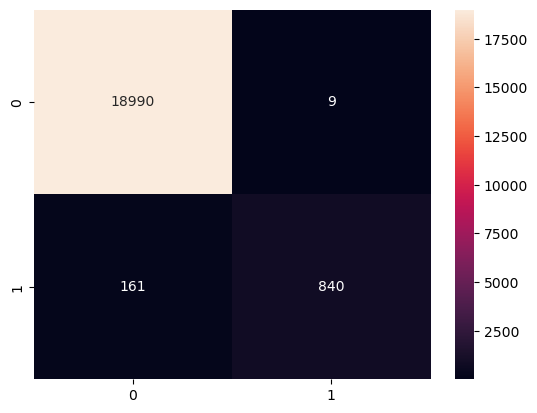

In [ ]:
#import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')